In [1]:
import torch
import module as m

%reload_ext autoreload
%autoreload 2

In [3]:
lin1 = m.LinearLayer(3, 3)
lin2 = m.LinearLayer(3,1)

x = torch.rand(2, 3)
x

tensor([[0.7140, 0.5529, 0.5147],
        [0.3735, 0.2469, 0.8807]])

In [4]:
model = m.Sequential(
    lin1, 
    m.ReLU(), 
    lin2, 
    m.Tanh(), 
    )

target = torch.rand(2, 1)
target

tensor([[0.2594],
        [0.5950]])

In [5]:
pred = model(x)
pred

tensor([[0.9922],
        [0.7843]])

In [6]:
model.loss(pred, target)

tensor(0.2864)

In [7]:
model.backward()

tensor([[ 0.0487,  0.0312, -0.0355],
        [ 0.3105,  0.1992, -0.2266]])

In [8]:
model.loss.gradient

tensor([[1.4656],
        [0.3785]])

### Test

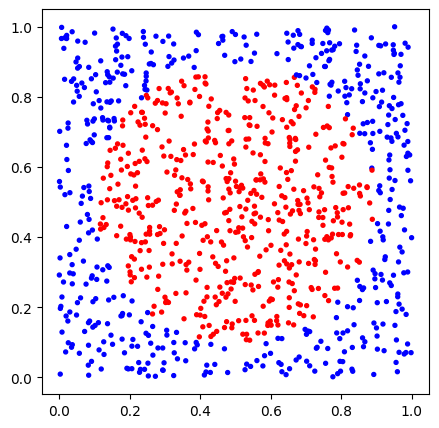

In [9]:
import math
import matplotlib.pyplot as plt

torch.set_grad_enabled(False)

N_SAMPLES = 1000


# Generate train
X_train = torch.rand(N_SAMPLES, 2)
y_train = torch.ones(N_SAMPLES)
X_test = torch.rand(N_SAMPLES, 2) 
y_test = torch.ones(N_SAMPLES)

# Set targets to 0 if outside disk centered at (0.5, 0.5) with radius 1/sqrt(2*pi)

y_train[
    torch.norm(X_train - torch.tensor([0.5, 0.5]), dim=1) \
    > 1/math.sqrt(2*math.pi)
    ] = 0
y_test[
    torch.norm(X_test - torch.tensor([0.5, 0.5]), dim=1) \
    > 1/math.sqrt(2*math.pi)
    ] = 0
    

plt.figure(figsize=(5,5))
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='bwr', s=8)


In [10]:
model = m.Sequential(
    m.LinearLayer(2, 10),
    m.Tanh(),
    m.LinearLayer(10, 100),
    m.ReLU(),
    m.LinearLayer(100, 10),
    m.Tanh(),
    m.LinearLayer(10, 1),
    m.Sigmoid(),
)

optim = m.SGD(model, lr=0.01)

In [11]:
epochs = 100
batch_size = 100
n_batches = N_SAMPLES // batch_size

for i in range(epochs):
    # Get random batch
    idx = torch.randint(0, N_SAMPLES, (batch_size,))
    for j in range(n_batches):
        X_batch = X_train[idx]
        y_batch = y_train[idx]

        loss = optim(X_batch, y_batch.unsqueeze(1), debug=False)

    print(f'Epoch {i+1}/{epochs}, Loss: {loss}', end='\r')

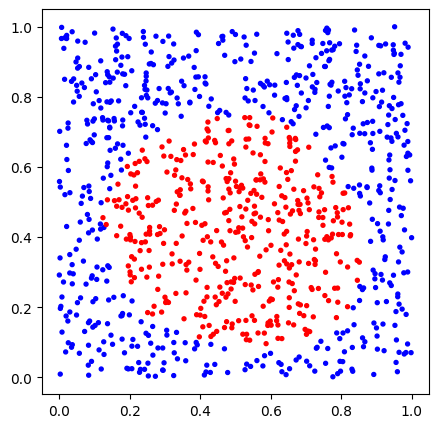

In [15]:
y_pred = model(X_train)
y_pred = y_pred > 0.5

plt.figure(figsize=(5,5))
p = plt.scatter(X_train[:,0], X_train[:,1], c=y_pred, cmap='bwr', s=8)

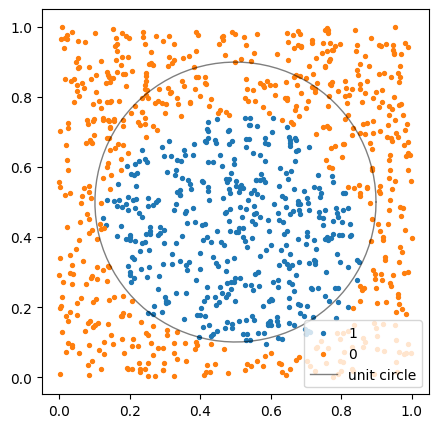

In [63]:
import numpy as np

plt.figure(figsize=(5,5))

mask1 = (y_pred==1).squeeze()
mask0 = (y_pred==0).squeeze()

plt.scatter(X_train[:,0][mask1], X_train[:,1][mask1], s=8, label=1)
plt.scatter(X_train[:,0][mask0], X_train[:,1][mask0], s=8, label=0)


# plot unit circle
t = np.linspace(0, 2*np.pi, 100)
plt.plot(0.5 + np.cos(t)/math.sqrt(2*math.pi), 0.5 + np.sin(t)/math.sqrt(2*math.pi), c='k', label='unit circle', lw=1, alpha=0.5)

plt.legend()